<h1 align=center > Loan Status Prediction </h1>

In [75]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [76]:
df = pd.read_csv('data/loan_data_set.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
503,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N


### Dimension of data

In [77]:
df.shape

(614, 13)

### How Many Null Values?

In [78]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### What type of data is?

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Cleaning

In [80]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
sns.set_context('paper', font_scale = 2)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Separate out Categorical and Numerical Features

In [82]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [83]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [84]:
num_df = df[num_cols]
num_df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
240,5819,5000.0,120.0,360.0,1.0
146,14866,0.0,70.0,360.0,1.0
273,2620,2223.0,150.0,360.0,1.0
150,6277,0.0,118.0,360.0,0.0
56,2132,1591.0,96.0,360.0,1.0


In [85]:
cat_df = df[cat_cols]
cat_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
502,Male,Yes,2,Graduate,No,Semiurban,Y
351,Male,No,0,Graduate,No,Rural,N
448,Male,Yes,2,Graduate,No,Rural,N
224,Male,Yes,0,Graduate,No,Semiurban,Y
500,Female,No,0,Graduate,No,Rural,Y


<h1 align=center > Exploratory Data Analysis </h1>

In [86]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 'Yes' if x == 'Y' else 'No')

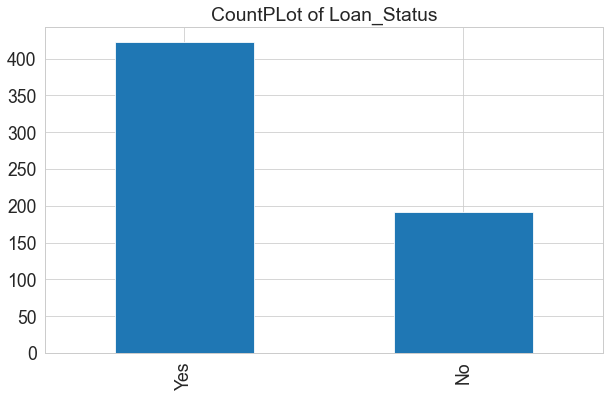

In [87]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('CountPLot of Loan_Status');

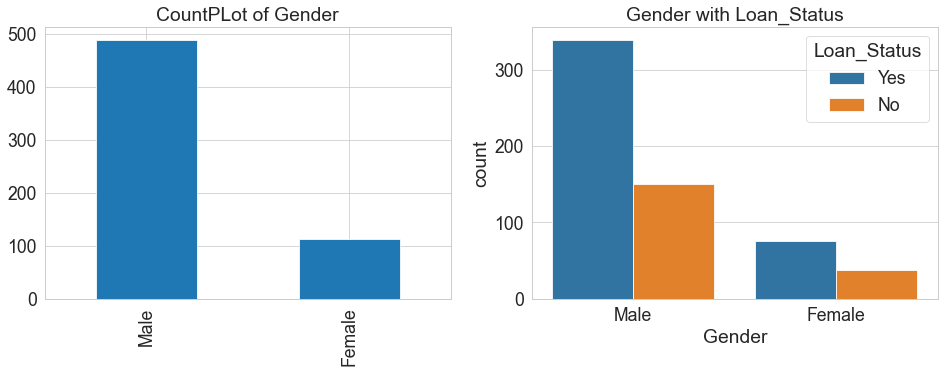

In [88]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Gender'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPLot of Gender')
sns.countplot(x = df['Gender'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Gender with Loan_Status');

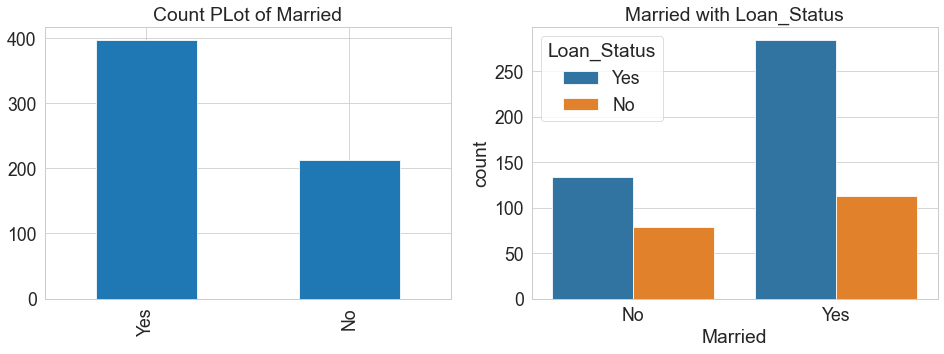

In [89]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Married'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Married')
sns.countplot(x = df['Married'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Married with Loan_Status');

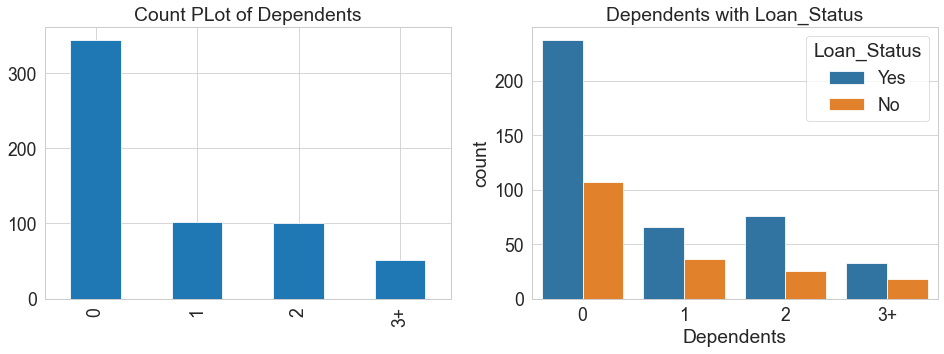

In [90]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Dependents'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Dependents')
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Dependents with Loan_Status');

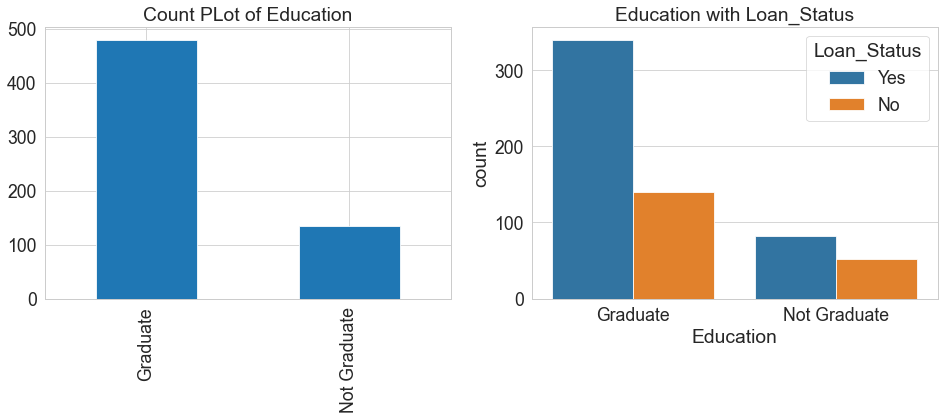

In [91]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Education'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Education')
sns.countplot(x = df['Education'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Education with Loan_Status');

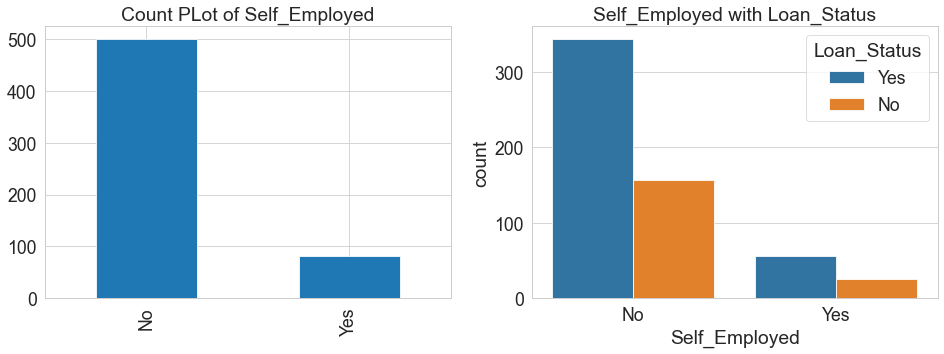

In [92]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Self_Employed'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Self_Employed')
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Self_Employed with Loan_Status');

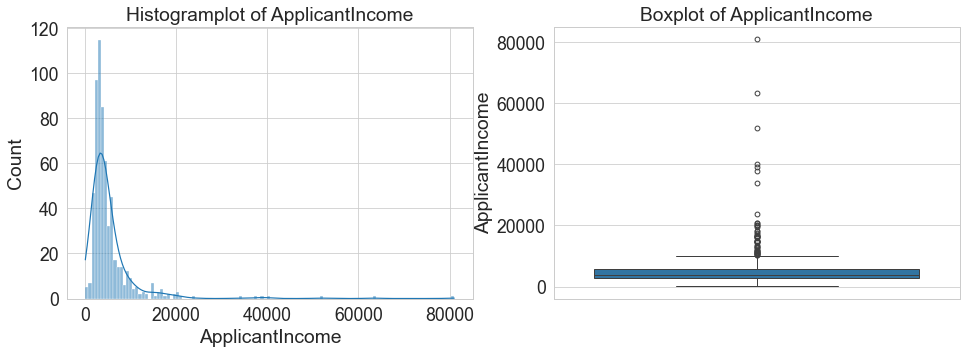

In [93]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['ApplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of ApplicantIncome')
sns.boxplot(df['ApplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of ApplicantIncome');

In [94]:
df['ApplicantIncome'].skew()

6.539513113994625

In [95]:
iqr = df['ApplicantIncome'].quantile(0.75) - df['ApplicantIncome'].quantile(0.25)
upper_limit= df['ApplicantIncome'].quantile(0.75) + iqr *1.5

In [96]:
tmp = df['ApplicantIncome']
df['ApplicantIncome']= np.where(df['ApplicantIncome'] >upper_limit,upper_limit,df['ApplicantIncome'])

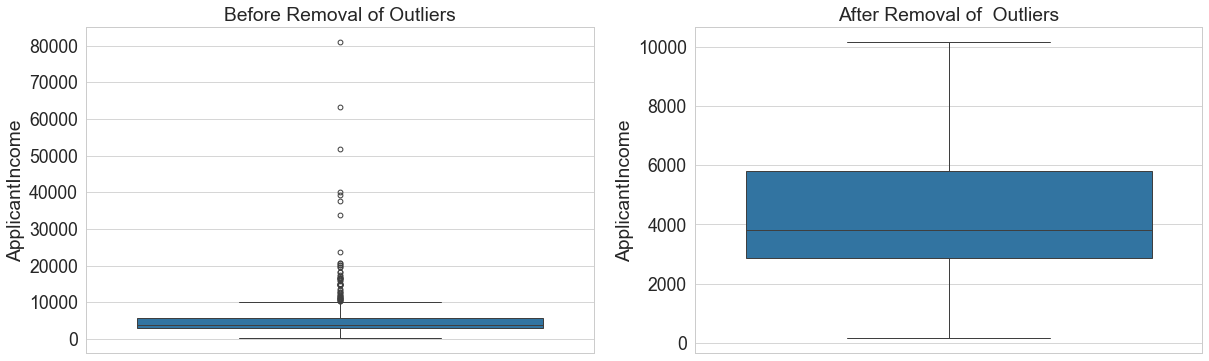

In [97]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['ApplicantIncome'],ax=ax2);

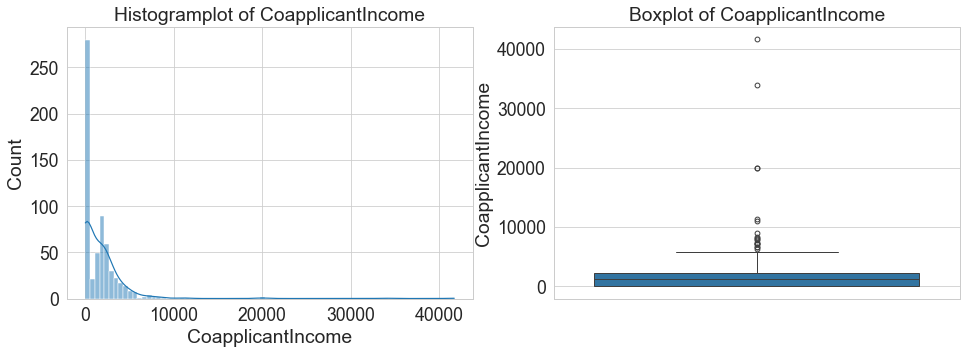

In [98]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['CoapplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of CoapplicantIncome')
sns.boxplot(df['CoapplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of CoapplicantIncome');

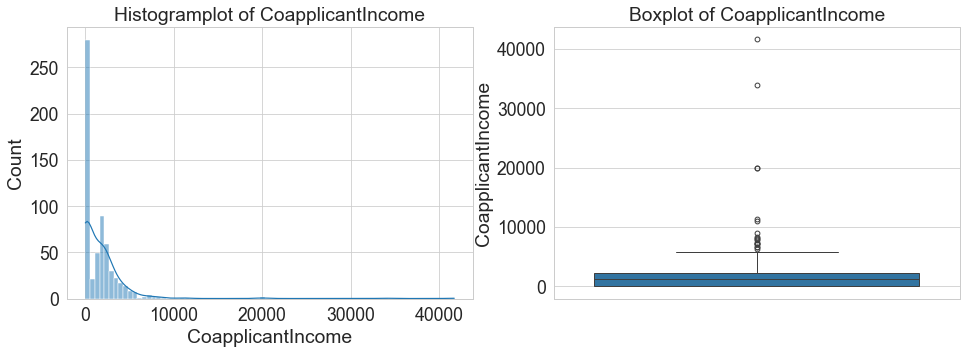

In [99]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['CoapplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of CoapplicantIncome')
sns.boxplot(df['CoapplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of CoapplicantIncome');

In [100]:
iqr = df['CoapplicantIncome'].quantile(0.75) - df['CoapplicantIncome'].quantile(0.25)
upper_limit= df['CoapplicantIncome'].quantile(0.75) + iqr *1.5

In [101]:
tmp = df['CoapplicantIncome']
df['CoapplicantIncome']= np.where(df['CoapplicantIncome'] >upper_limit,upper_limit,df['CoapplicantIncome'])

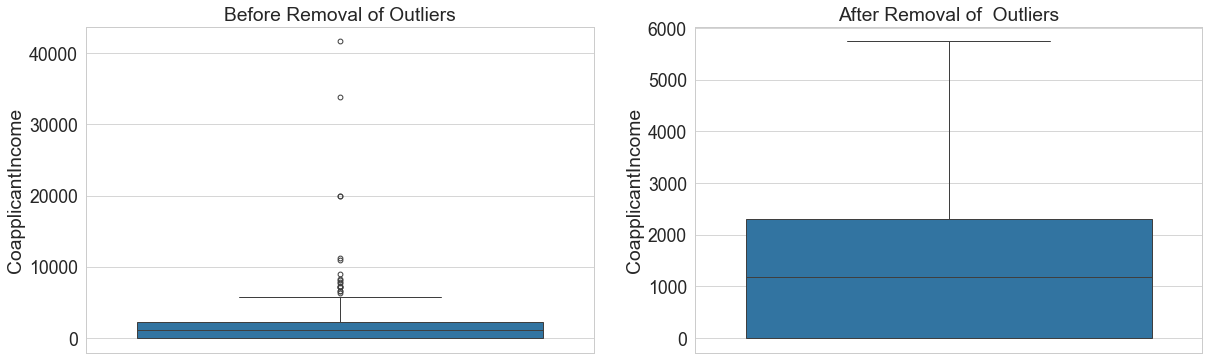

In [102]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['CoapplicantIncome'],ax=ax2);

C:\Program Files\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


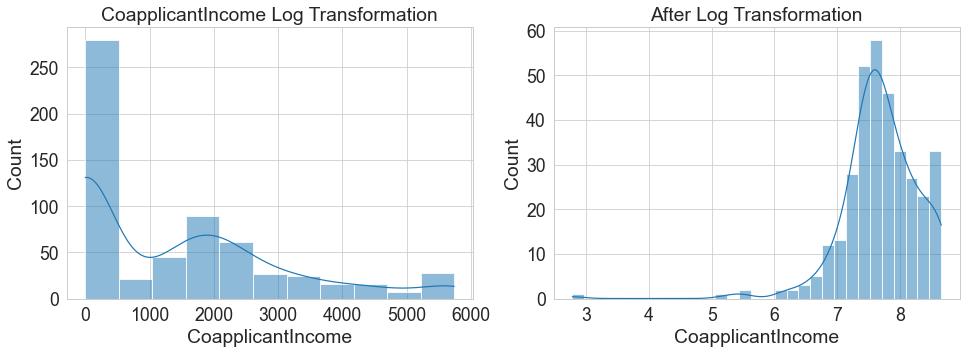

In [103]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['CoapplicantIncome'],kde=True,ax=ax1)
ax1.set_title('CoapplicantIncome Log Transformation')
sns.histplot(np.log(df['CoapplicantIncome']),kde=True,ax=ax2)
ax2.set_title('After Log Transformation');

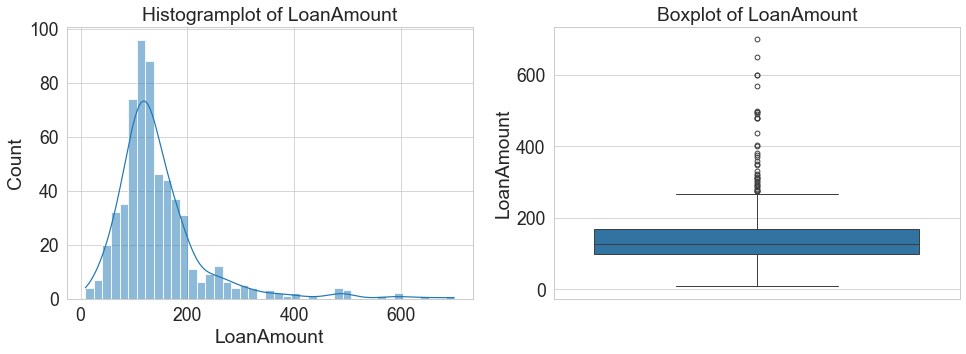

In [104]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['LoanAmount'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of LoanAmount')
sns.boxplot(df['LoanAmount'],ax=ax2)
ax2.set_title('Boxplot of LoanAmount');

In [105]:
df['LoanAmount'].skew()

2.677551679256059

In [106]:
iqr = df['LoanAmount'].quantile(0.75) - df['LoanAmount'].quantile(0.25)
upper_limit= df['LoanAmount'].quantile(0.75) + iqr *1.5

In [107]:
tmp = df['LoanAmount']
df['LoanAmount']= np.where(df['LoanAmount'] >upper_limit,upper_limit,df['LoanAmount'])

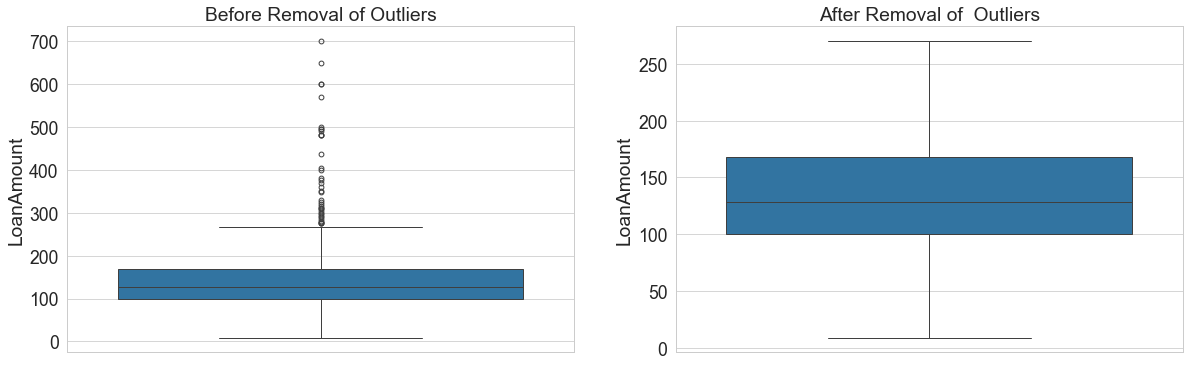

In [108]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['LoanAmount'],ax=ax2);

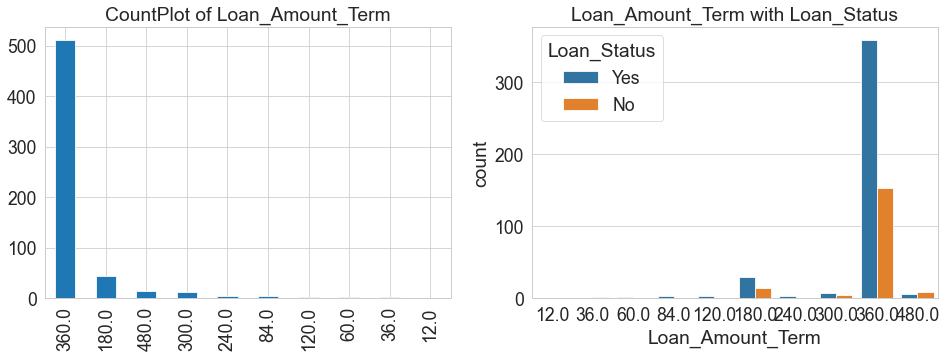

In [109]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Loan_Amount_Term'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPlot of Loan_Amount_Term')
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Loan_Amount_Term with Loan_Status');

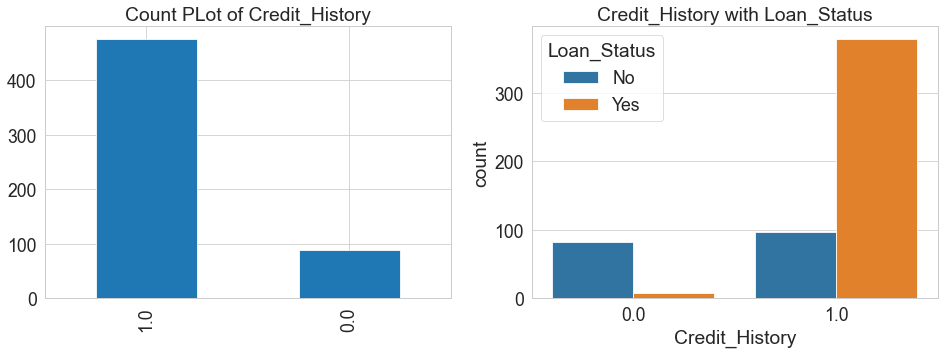

In [110]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Credit_History'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Credit_History')
sns.countplot(x = df['Credit_History'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Credit_History with Loan_Status');

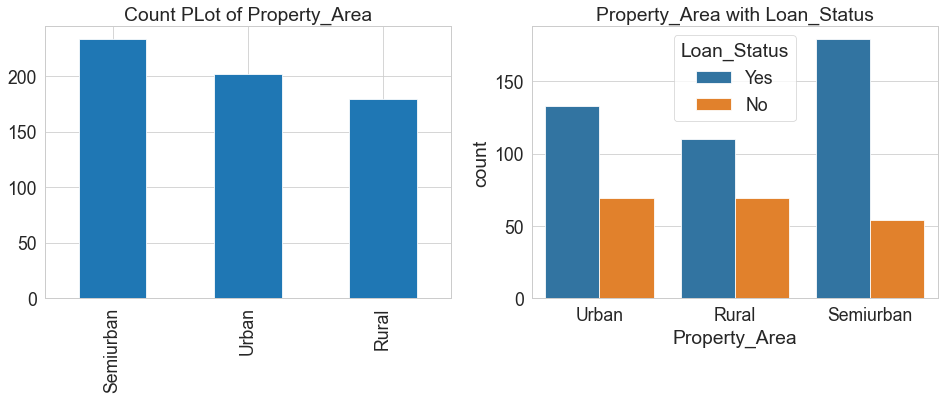

In [111]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Property_Area'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Property_Area')
sns.countplot(x = df['Property_Area'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Property_Area with Loan_Status');

### Feature Selection

In [112]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Yes


### chi_test

In [113]:
from scipy.stats import chi2_contingency
catagorical_cols = [0,1,2,3,4,8,9,10]
cols_drop = []
score = []
for i in catagorical_cols:
    
    ct = pd.crosstab(df['Loan_Status'], df[df.columns[i]])
    
    chi2_stats, p_value, dof, expected_frequency = chi2_contingency(ct)

    if p_value > 0.05:
        cols_drop.append(df.columns[i])    
    score.append(p_value)

In [114]:
len(cols_drop)

4

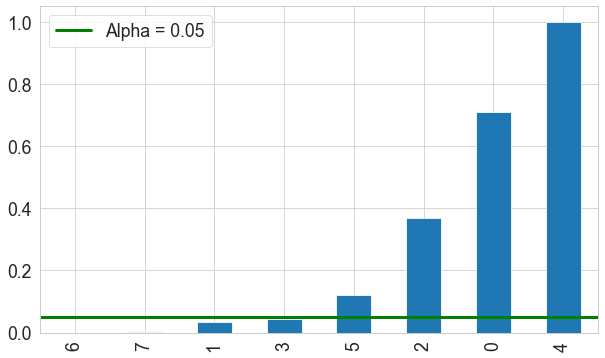

In [115]:
pd.Series(score).sort_values(ascending=True).plot(kind='bar')
plt.axhline(y=0.05, color='g', label='Alpha = 0.05', linewidth=3)
plt.legend()  # Add this line to display the legend
plt.show()

In [122]:
df.drop(columns=cols_drop,inplace=True)
df.head(5)

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,No,Graduate,5849.0,0.0,NaN,1.0,Urban,1
1,Yes,Graduate,4583.0,1508.0,128.0,1.0,Rural,0
2,Yes,Graduate,3000.0,0.0,66.0,1.0,Urban,1
3,Yes,Not Graduate,2583.0,2358.0,120.0,1.0,Urban,1
4,No,Graduate,6000.0,0.0,141.0,1.0,Urban,1


In [123]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [124]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Yes' else 0)

In [125]:
X = df.drop(columns=['Loan_Status'])
y = df[['Loan_Status']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.pipeline import Pipeline

numeric_cols = [2,3,4]
categorical_cols = [0,5] 
ordinal = [1]

numeric_transformer = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])


ord_encoder = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
     ('ord', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord',ord_encoder ,ordinal)
    ])

# Creating the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [127]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [128]:
x_train.shape

(491, 6)

In [129]:
x_test.shape

(123, 6)

In [130]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

### Logistic Regression

In [131]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predictions = logreg.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [132]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

NameError: name 'predictions' is not defined

### Decision Tree

In [133]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
predictions = dt_classifier.predict(x_test)

In [134]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


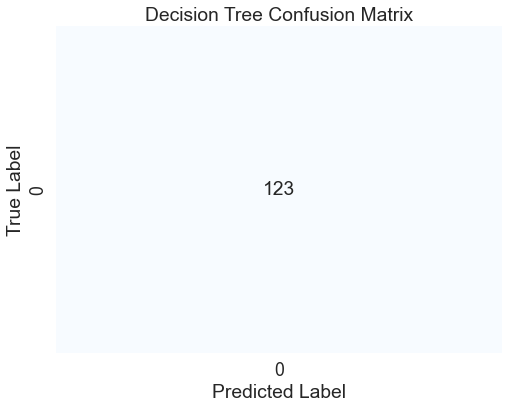

In [135]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [136]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### Random Forest

In [137]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
predictions = rf_classifier.predict(x_test)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7796\3154804548.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


In [138]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


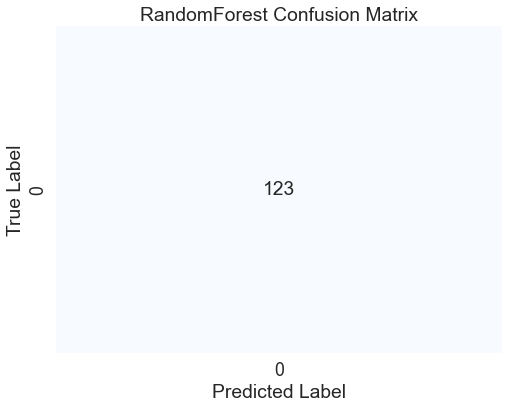

In [139]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"RandomForest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [140]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### AdaBoost

In [141]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)
predictions = adaboost_classifier.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


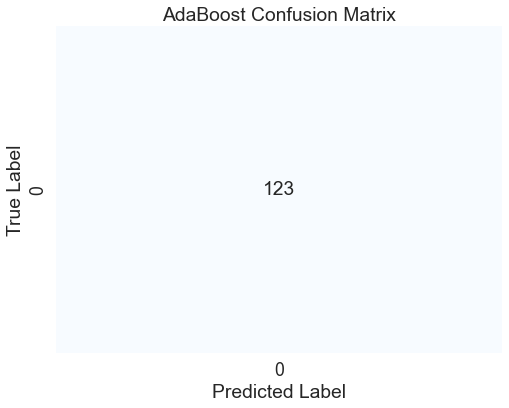

In [143]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"AdaBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [144]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### Gradient Boosting

In [145]:
gradientboost_classifier = GradientBoostingClassifier()
gradientboost_classifier.fit(x_train, y_train)
predictions = gradientboost_classifier.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

### Support Vector Machine (SVM)

In [146]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
predictions = svm_classifier.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Support Vector Machine (SVM) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [147]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



### XGBoost

In [148]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
predictions = xgb_classifier.predict(x_test)

In [149]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


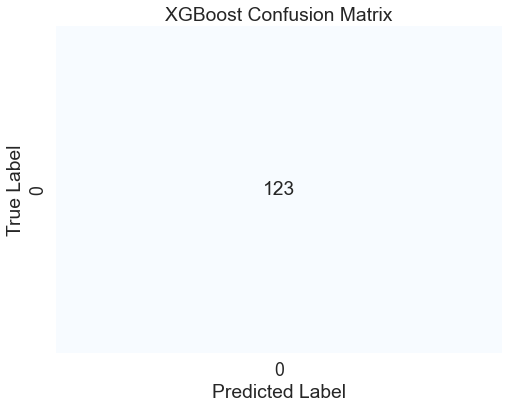

In [150]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [151]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [152]:
X = df.drop(columns=['Loan_Status'])
y = df[['Loan_Status']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
from sklearn.pipeline import Pipeline

numeric_cols = [2,3,4]
categorical_cols = [0,5] 
ordinal = [1]

numeric_transformer = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])


ord_encoder = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
     ('ord', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord',ord_encoder ,ordinal)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',SVC())
])


In [154]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
y_pred

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1 class

### Deploying  Model 

In [155]:
import pickle
pickle.dump(pipeline,open('Loan Status predictions.pkl','wb'))

In [156]:
pipe = pickle.load(open('Loan Status predictions.pkl','rb'))

In [160]:
x_train.columns

Index(['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History', 'Property_Area'],
      dtype='object')

In [158]:
x_train['Property_Area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [ ]:
test_input2 = np.array([ 'No', 'Graduate',2833.0,1857.0,126.0,1.0,'Rural'],dtype=object).reshape(1,7)

In [ ]:
pipe.predict(test_input2)